In [1]:
import IsoDAT2D as iso
import SimDAT2D as sim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import pyFAI, fabio
from pyFAI.gui import jupyter
import pyFAI
import os
import matplotlib.pyplot as plt
import masking
import cupy
import nimfa

In [2]:
#masking algoirthm to create masks for the data

def make_masks(array, slices, offset = 5, width=.5, gits = False):
    masks = []
    mask_2048 = np.zeros((2048, 2048), dtype=bool)
    mask_2048[1024:] = True
    for i in slices:
        masks.append(masking.generate_mask_slices(array, width, i, offset = offset))
        print('Mask with {} slices created'.format(i))
        if gits == True:
            gits_masks = []
            for i in range(len(masks)):
                masks_p = masks[i] + mask_2048
                gits_masks.append(masks_p)
                plt.imshow(masks_p)
    return gits_masks

In [3]:
os.chdir(r'/blue/mbutala/dalverson/IsoDAT_Experiment_Data/NSLS-II')

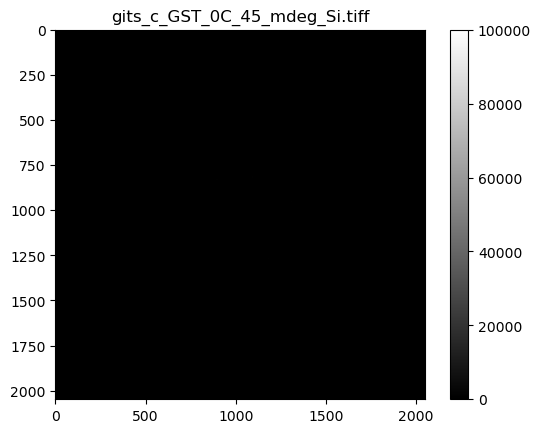

In [4]:
# Load the TIFF file
file_path = 'Xtalline_GST_SC_avg_im.tiff'
# file_path2 = 'gits_c_GST_50_mdeg_Si.tiff'
# file_path3 = 'gits_c_GST_55_mdeg_Si.tiff'
image = fabio.open(file_path).data
# image2 = fabio.open(file_path2).data
# image3 = fabio.open(file_path3).data

# Display the image
plt.imshow(image, cmap='gray', vmin = 0, vmax = 100000)
plt.title('gits_c_GST_0C_45_mdeg_Si.tiff')
plt.colorbar()
plt.show()

In [5]:
os.chdir(r'/blue/mbutala/dalverson/gits_experiment/Averaged_Tif_images/Substrates')

In [6]:
file_path4 = 'gits_Si_sub_111_45_mdeg.tiff'

image4 = fabio.open(file_path4).data

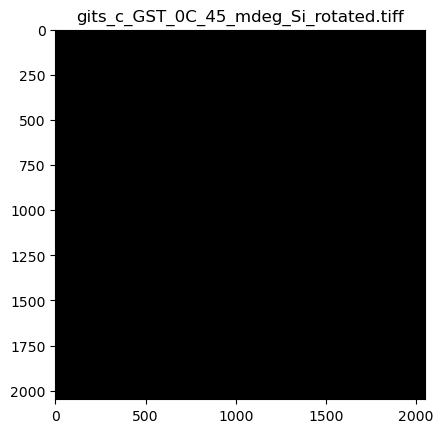

In [5]:
# Rotate the images by 180 degrees
image_rotated = np.rot90(image, 2)
# image2_rotated = np.rot90(image2, 2)
# image3_rotated = np.rot90(image3, 2)
# image4_rotated = np.rot90(image4, 2)

# Display the rotated images
plt.imshow(image_rotated, cmap='gray', vmin=0, vmax=100000)
plt.title('gits_c_GST_0C_45_mdeg_Si_rotated.tiff')
plt.show()

# plt.imshow(image2_rotated, cmap='gray', vmin=0, vmax=100000)
# plt.title('gits_c_GST_0C_50_mdeg_Si_rotated.tiff')
# plt.show()

# plt.imshow(image3_rotated, cmap='gray', vmin=0, vmax=100000)
# plt.title('gits_c_GST_0C_55_mdeg_Si_rotated.tiff')
# plt.show()

# plt.imshow(image4_rotated, cmap='gray', vmin=0, vmax=100000)
# plt.title('gits_Si_sub_111_45_mdeg_rotated.tiff')
# plt.show()

[masked_array(
  data=[[-135.00017100451313, -134.97216689027152, -134.94413749056966,
         ..., -45.05619265132289, -45.02816084175853, -45.00015640746067],
        [-135.02817528583523, -135.0001711717571, -134.97214174542282,
         ..., -45.02818839694317, -45.00015656042945, -44.97215212598207],
        [-135.05620485260465, -135.02820076548636, -135.000171339316,
         ..., -45.00015880320792, -44.972126966543236,
         -44.94412255874272],
        ...,
        [135.0561923155709, 135.02818822843457, 135.00015880225814, ...,
         45.00017134026579, 44.97213950359518, 44.94413509577675],
        [135.0281606735792, 135.000156559494, 134.9721271331666, ...,
         45.028203009199196, 45.00017117269255, 44.972166738238265],
        [135.00015640652705, 134.97215229229232, 134.94412289261135, ...,
         45.05620724928089, 45.028175439737566, 45.00017100544677]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

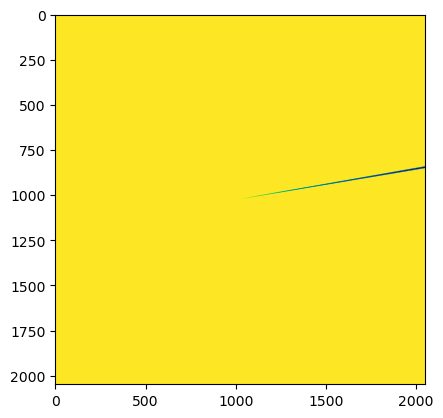

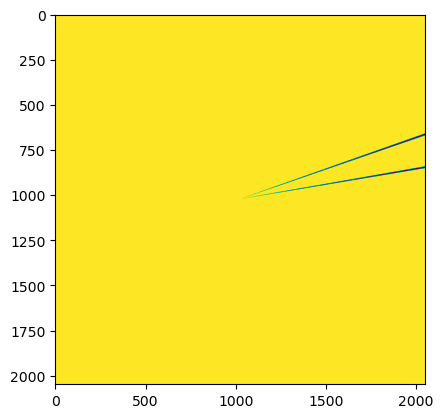

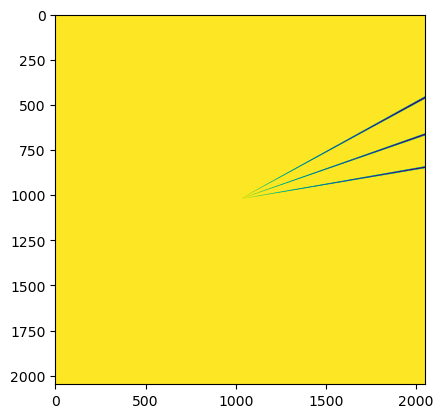

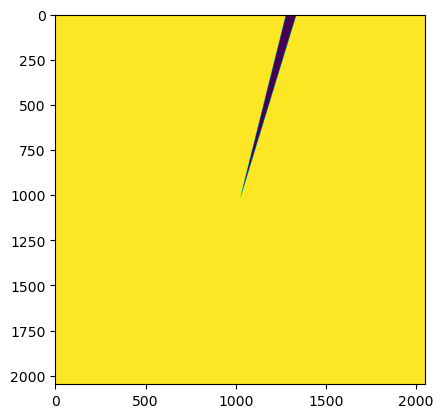

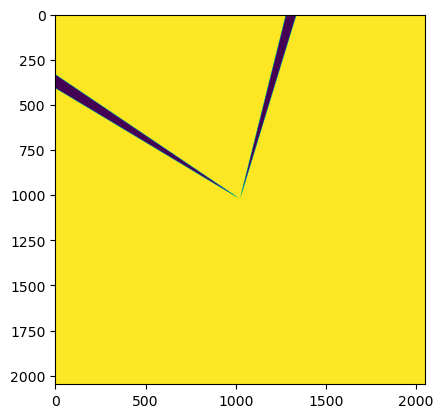

In [6]:
array, ai_pe = masking.make_chi_array(image_rotated , .4, .5e-10)
masks = make_masks(array, [1,2,3], offset = 9, width = .5, gits = True)
masks_v2 = make_masks(array, [1,2], offset = 70, width = 3, gits = True)
mask_one = masks[0] 
mask_two = masks[1] 
mask_three = masks[2] 
mask_four = masks_v2[0] 
mask_five = masks_v2[1]

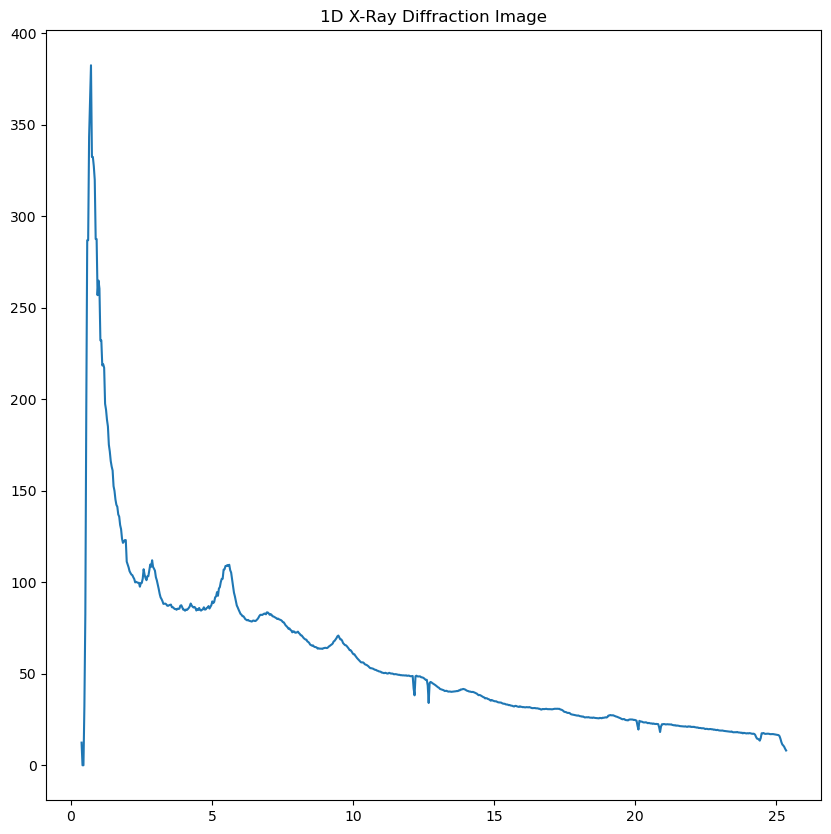

In [7]:
q, integrated_im = sim.integrate_image(image_rotated, .4, .122e-10, resolution = 750, mask = mask_two, show = True)
# q, integrated_im2 = sim.integrate_image(image4_rotated, .4, .122e-10, resolution = 750, mask = mask_two, show = True)

In [8]:
my_poni = 'Ni_calib_20210711-135644_f555fb_0001.poni'

/home/dalverson/miniconda3/envs/venv/lib/python3.11/site-packages/pyopencl/cache.py:495: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  _create_built_program_from_source_cached(


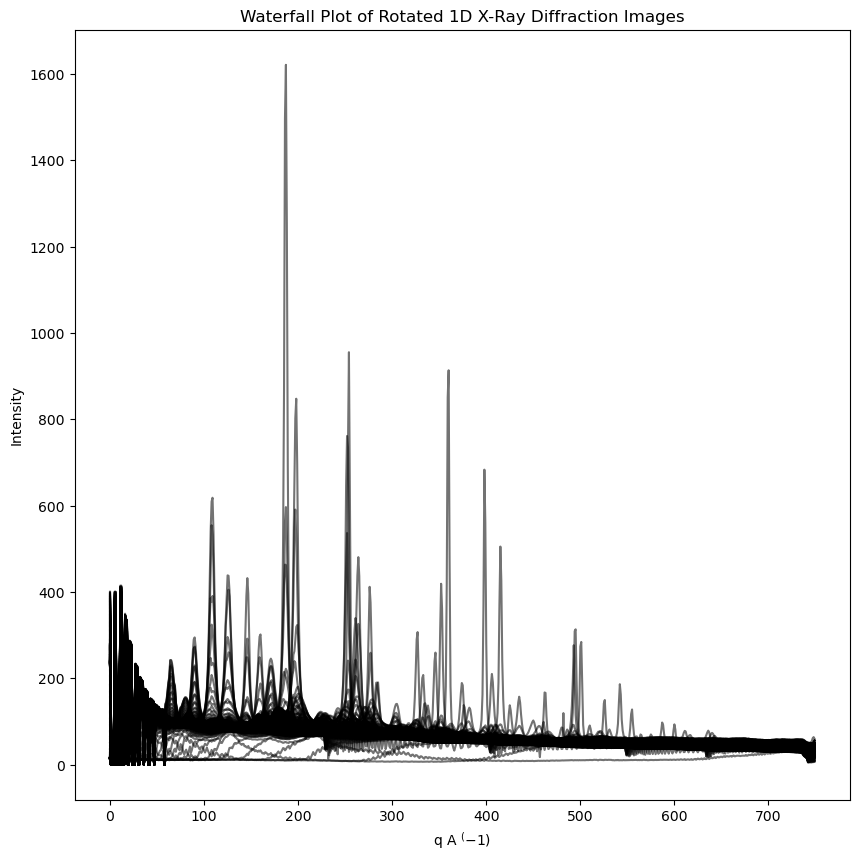

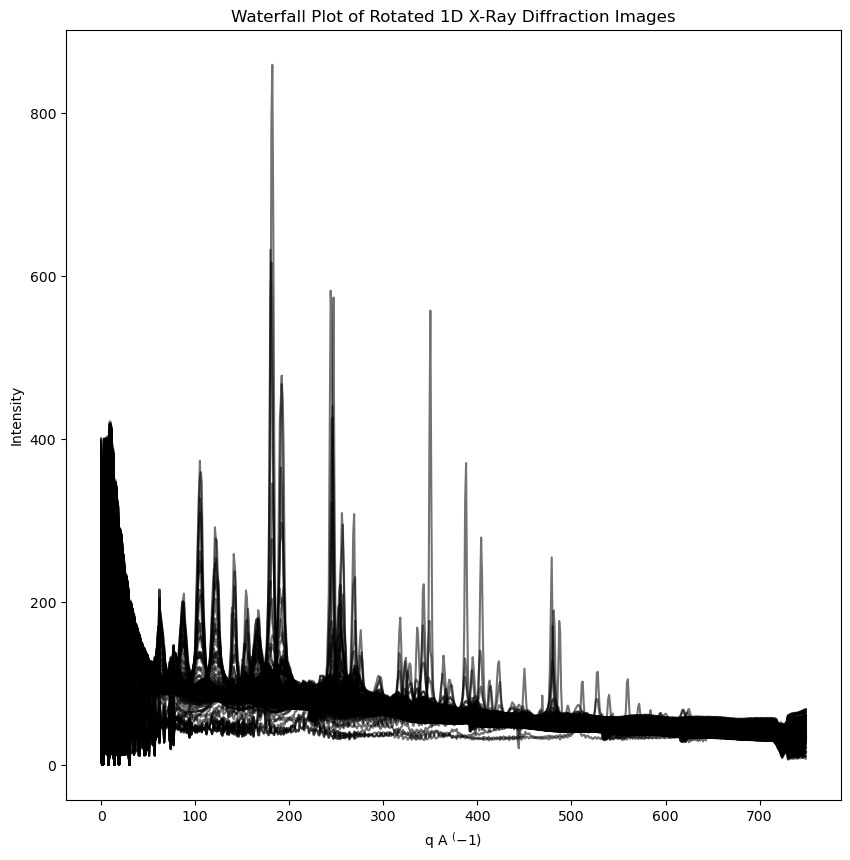

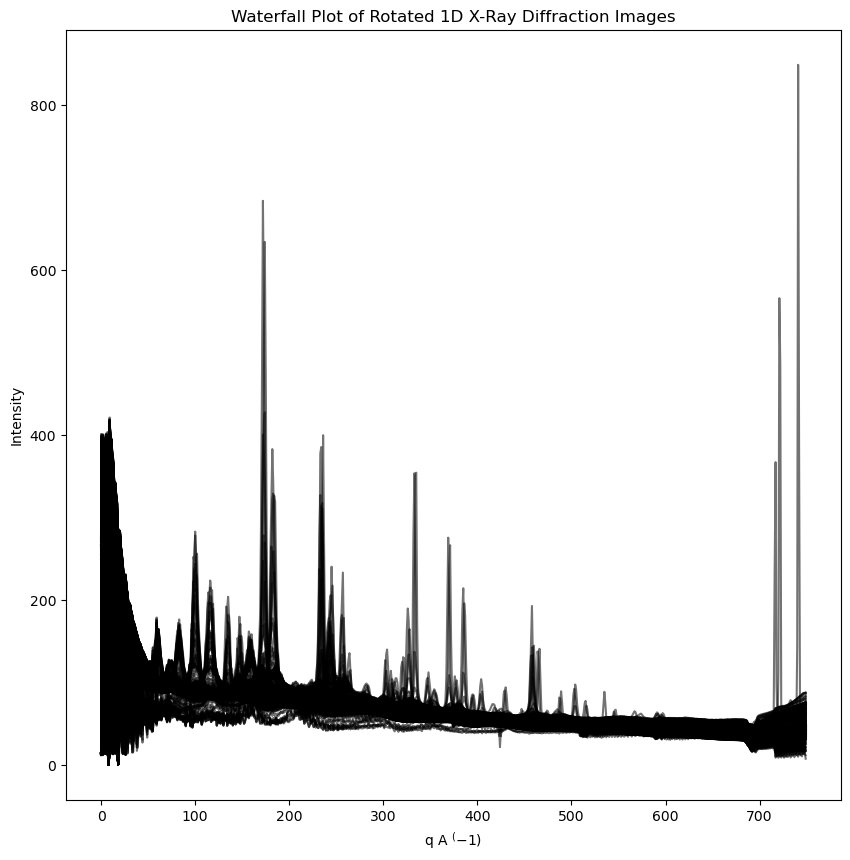

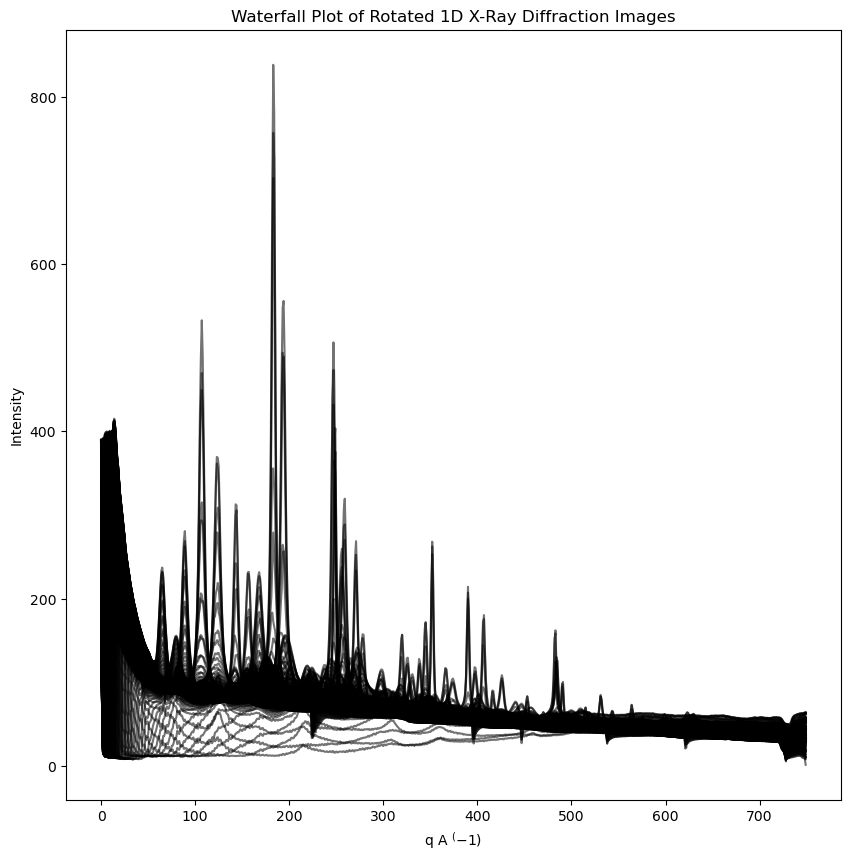

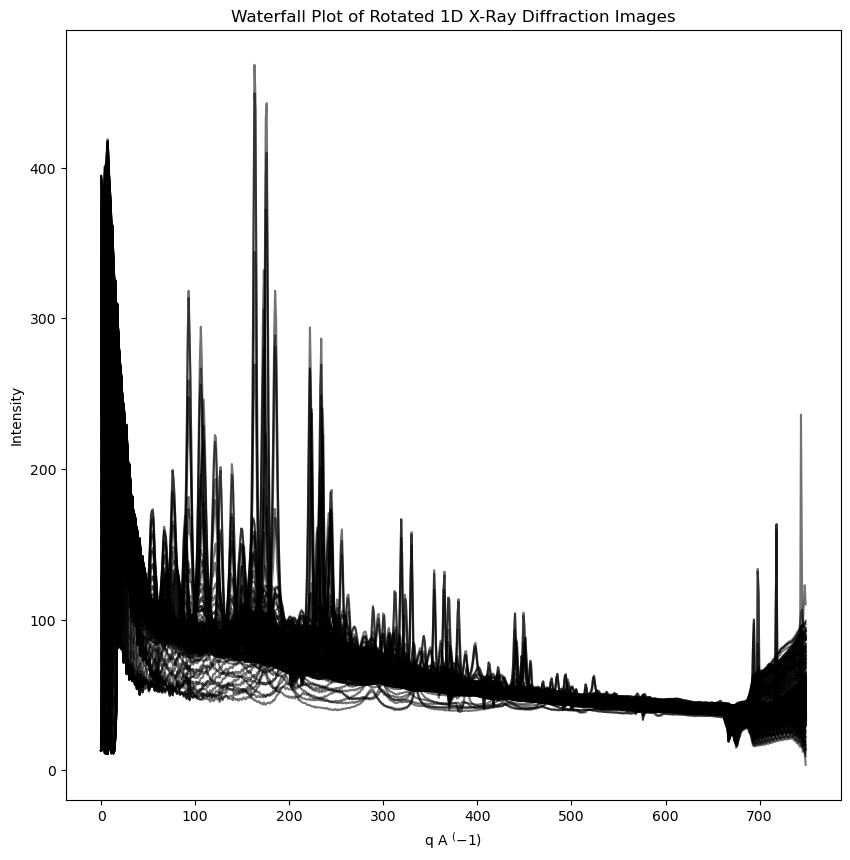

In [9]:
rotated_data = iso.rotate_integrate_image_gpu(image_rotated , 1, .4, .122e-10, resolution = 750, mask = mask_one, poni = my_poni)
rotated_data_v2 = iso.rotate_integrate_image_gpu(image_rotated , 1, .4, .122e-10, resolution = 750, mask = mask_two, poni = my_poni)
rotated_data_v3 = iso.rotate_integrate_image_gpu(image_rotated , 1, .4, .122e-10, resolution = 750, mask = mask_three, poni = my_poni)
rotated_data_v4 = iso.rotate_integrate_image_gpu(image_rotated , 1, .4, .122e-10, resolution = 750, mask = mask_four, poni = my_poni)
rotated_data_v5 = iso.rotate_integrate_image_gpu(image_rotated , 1, .4, .122e-10, resolution = 750, mask = mask_five, poni = my_poni)

In [10]:
column_mapping = {}
for i in range(361, 721):
    column_mapping[(i - 361)] = (i)
rotated_data_v2.rename(columns=column_mapping, inplace=True) 
   
column_mapping = {}
for i in range(722, 1082):
    column_mapping[(i - 722)] = (i)
print(column_mapping)
rotated_data_v3.rename(columns=column_mapping, inplace=True) 

column_mapping = {}
for i in range(1083, 1443):
    column_mapping[(i - 1083)] = (i)
print(column_mapping)
rotated_data_v4.rename(columns=column_mapping, inplace=True)  
  
column_mapping = {}
for i in range(1444, 1804):
    column_mapping[(i - 1444)] = (i)
rotated_data_v5.rename(columns=column_mapping, inplace=True)

combining = pd.concat([rotated_data, rotated_data_v2, rotated_data_v3, rotated_data_v4, rotated_data_v5], axis = 1)
combined_rot_data = combining.clip(lower=0)
combined_rot_data = np.array(combined_rot_data) 

{0: 722, 1: 723, 2: 724, 3: 725, 4: 726, 5: 727, 6: 728, 7: 729, 8: 730, 9: 731, 10: 732, 11: 733, 12: 734, 13: 735, 14: 736, 15: 737, 16: 738, 17: 739, 18: 740, 19: 741, 20: 742, 21: 743, 22: 744, 23: 745, 24: 746, 25: 747, 26: 748, 27: 749, 28: 750, 29: 751, 30: 752, 31: 753, 32: 754, 33: 755, 34: 756, 35: 757, 36: 758, 37: 759, 38: 760, 39: 761, 40: 762, 41: 763, 42: 764, 43: 765, 44: 766, 45: 767, 46: 768, 47: 769, 48: 770, 49: 771, 50: 772, 51: 773, 52: 774, 53: 775, 54: 776, 55: 777, 56: 778, 57: 779, 58: 780, 59: 781, 60: 782, 61: 783, 62: 784, 63: 785, 64: 786, 65: 787, 66: 788, 67: 789, 68: 790, 69: 791, 70: 792, 71: 793, 72: 794, 73: 795, 74: 796, 75: 797, 76: 798, 77: 799, 78: 800, 79: 801, 80: 802, 81: 803, 82: 804, 83: 805, 84: 806, 85: 807, 86: 808, 87: 809, 88: 810, 89: 811, 90: 812, 91: 813, 92: 814, 93: 815, 94: 816, 95: 817, 96: 818, 97: 819, 98: 820, 99: 821, 100: 822, 101: 823, 102: 824, 103: 825, 104: 826, 105: 827, 106: 828, 107: 829, 108: 830, 109: 831, 110: 832,

Starting NMF algorithm with the following parameters:

Max components: 50
Max iterations: 1000
Init: random
Solver: cd
Tolerance: 0.0001
Patience: 5
Random
Random initializers completed
Continuing with best run parameters that are init: nndsvdar, solver: cd, tol: 0.0001
Run with 1 components has been completed
Run with 2 components has been completed
Run with 3 components has been completed
Run with 4 components has been completed
Run with 5 components has been completed
Run with 6 components has been completed
Run with 7 components has been completed
Run with 8 components has been completed
Run with 9 components has been completed
Run with 10 components has been completed
Run with 11 components has been completed
Run with 12 components has been completed
Run with 13 components has been completed
Run with 14 components has been completed
Run with 15 components has been completed
Run with 16 components has been completed
Run with 17 components has been completed
Run with 18 components h

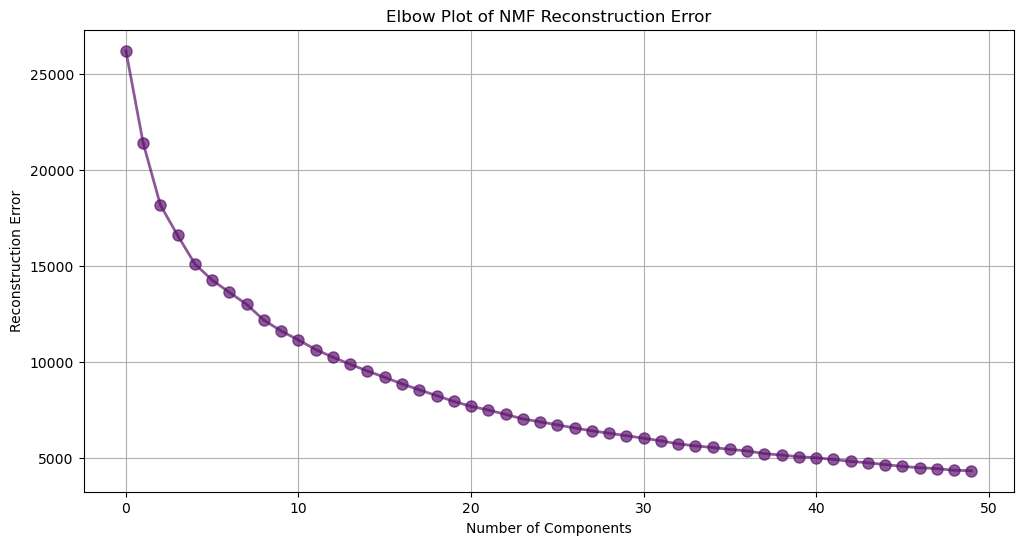

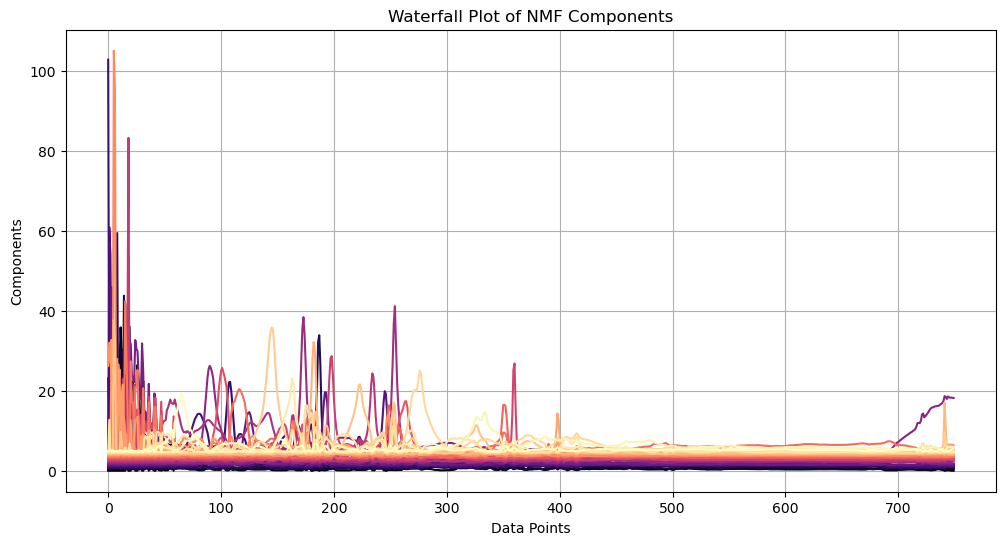

The best number of components is 50


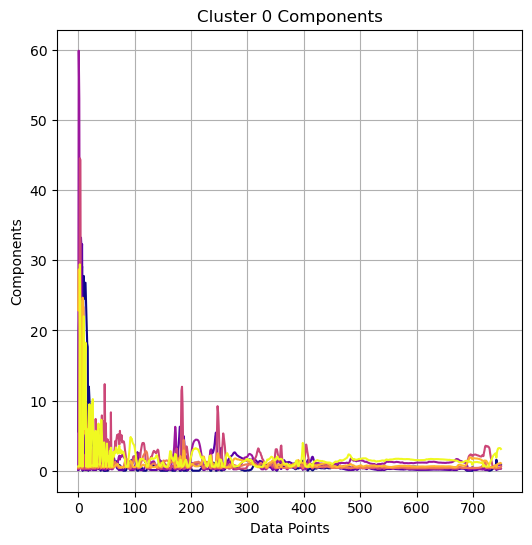

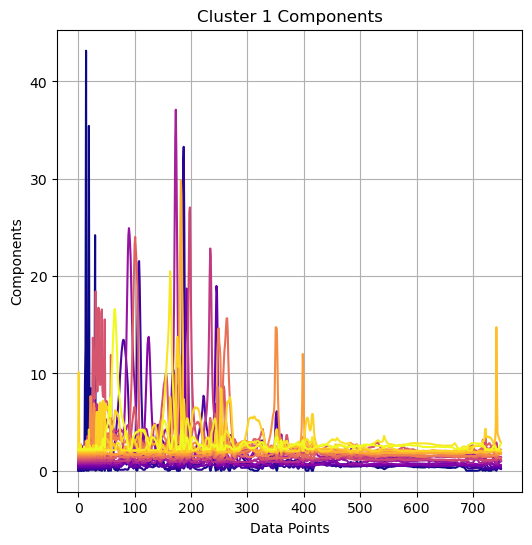

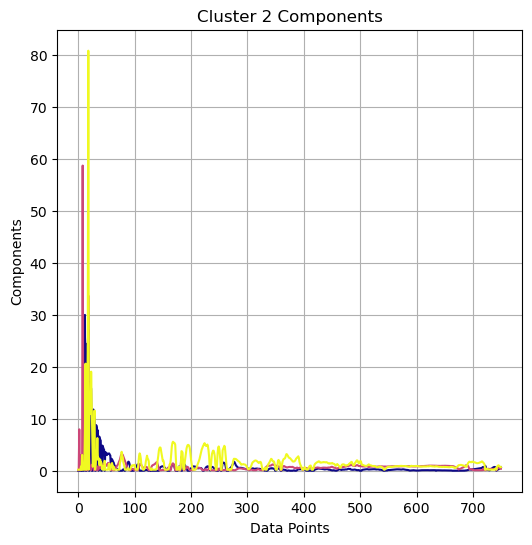

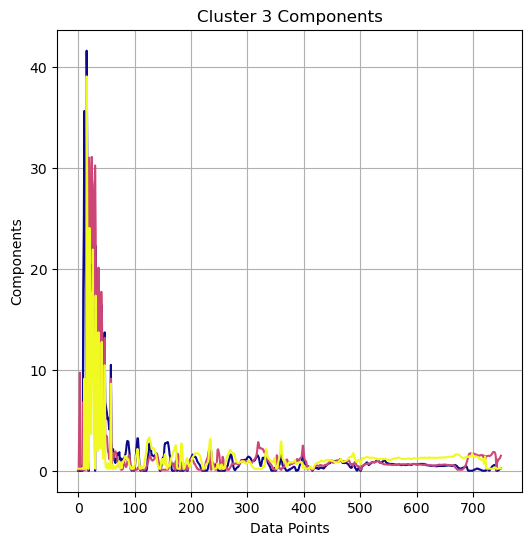

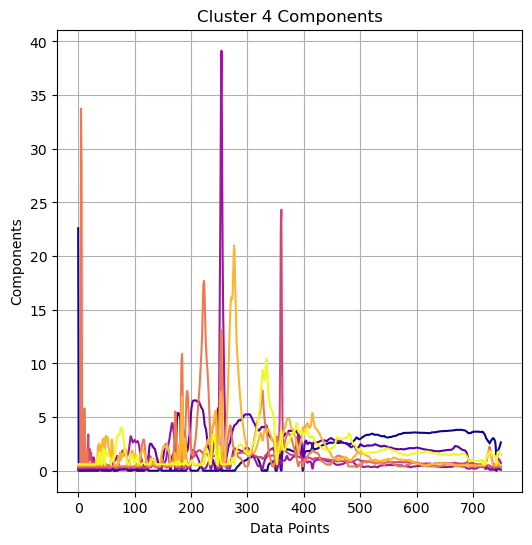

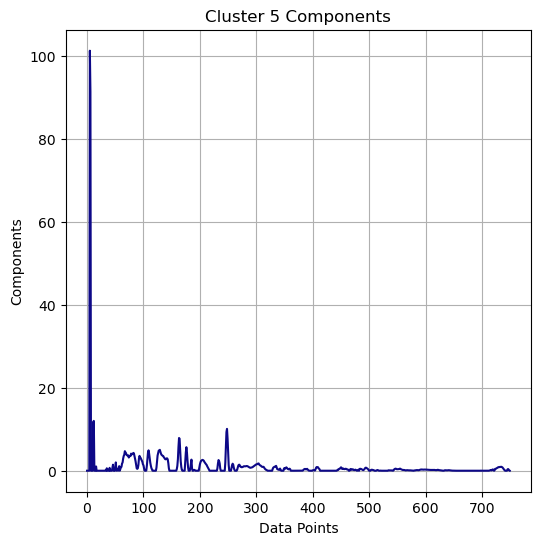

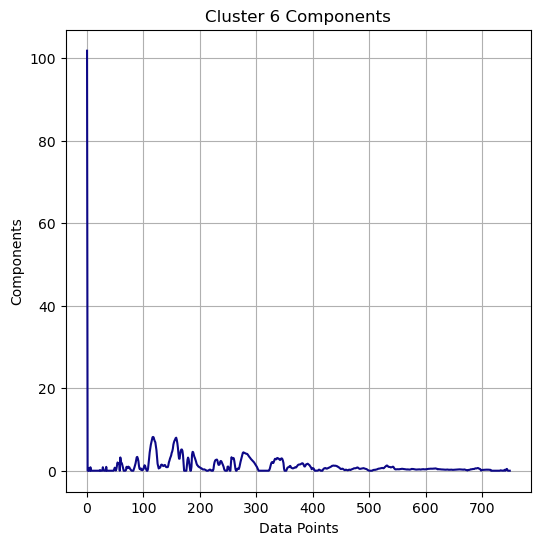

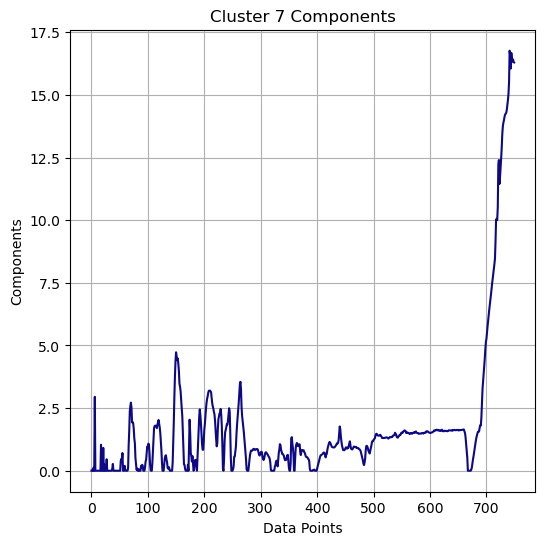

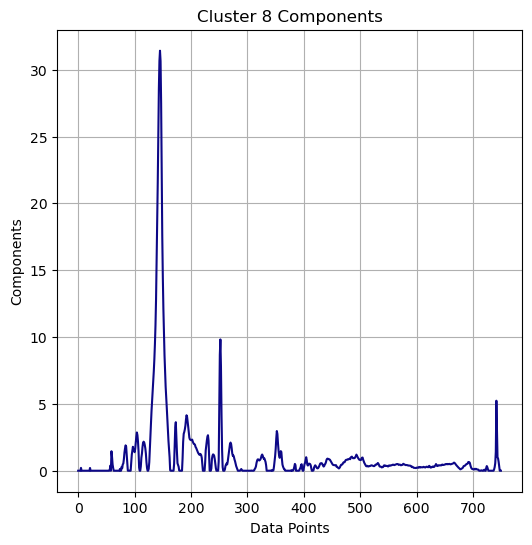

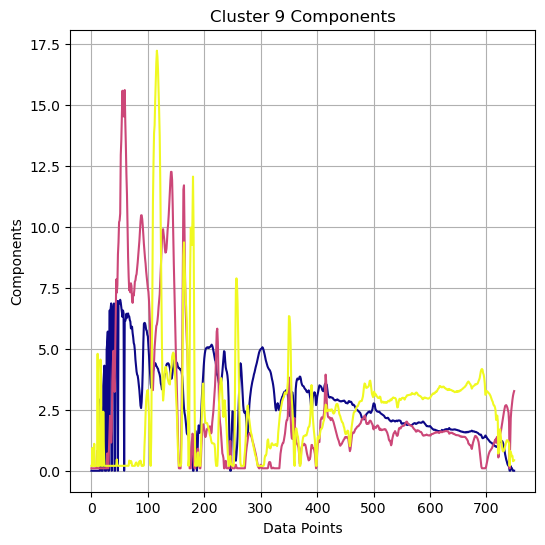

In [11]:
best_W, best_H, best_reconstruction_err, data_dict =  iso.run_sklearn_nmf_and_agg_cluster(combined_rot_data, max_components = 50, max_iter = 1000, n_clusters = 10, cluster_matrix = 'W')

In [16]:
one = data_dict[2][1]
two = data_dict[2][2]

three = np.array(one + two / 2)
three = pd.DataFrame(three, index = q)

#three.to_csv('gits_c_GST_0C_45_mdeg_Si_from_iso.csv')

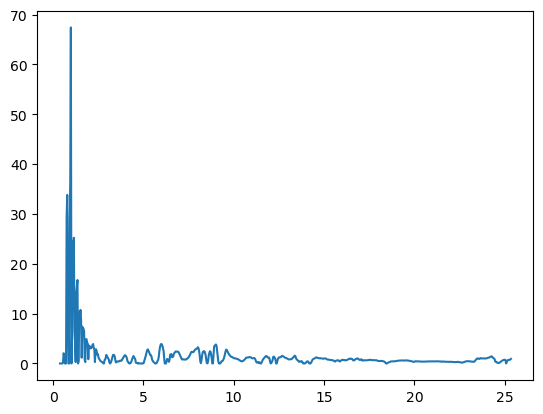

In [15]:
plt.plot(three)

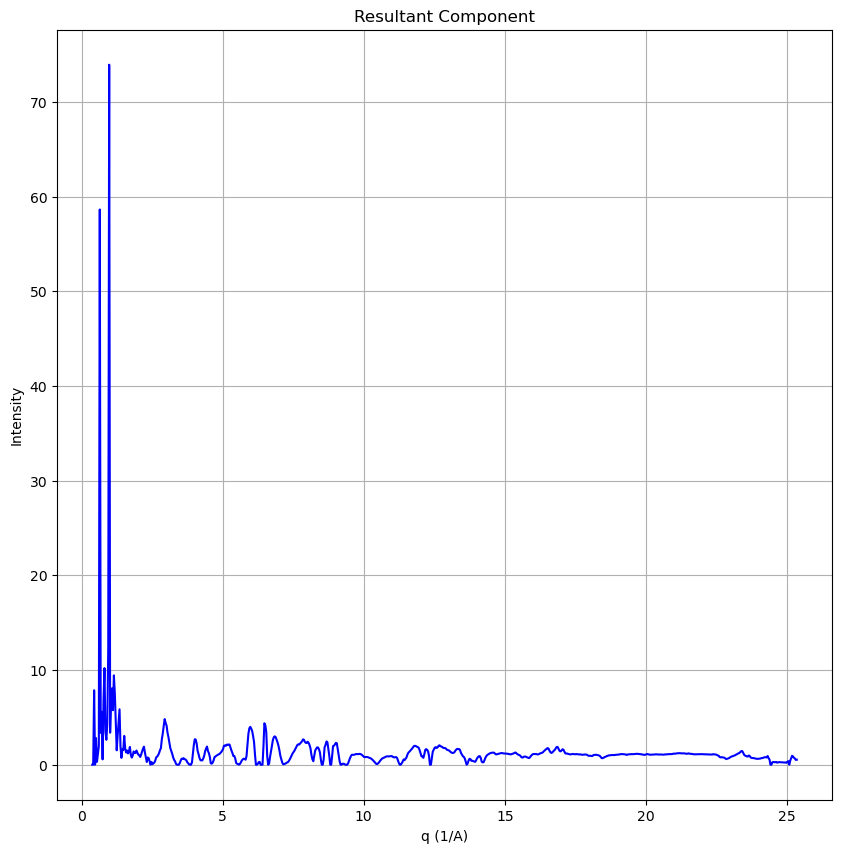

In [17]:
#make a really nice matplotlib plot to show the data with grid lines and labels


plt.figure(figsize=(10, 10))
plt.plot(q, three, c= 'b')
plt.xlabel('q (1/A)')
plt.ylabel('Intensity')
plt.title('Resultant Component')
plt.grid()

In [ ]:
one = data_dict[0][0]
two = data_dict[0][1]

three = np.array(one + two / 2)
three = pd.DataFrame(three, index = q)

three.to_csv('gits_c_GST_0C_45_mdeg_Si_from_iso.csv')

In [31]:
os.getcwd()

'/blue/mbutala/dalverson/gits_experiment/Averaged_Tif_images/GST_0C/Silicon_Substrate'

In [23]:
best_H

array([[7.54615173e+01, 7.41532059e+01, 7.57949829e+01, ...,
        8.49852753e+01, 8.47154846e+01, 8.43452072e+01],
       [0.00000000e+00, 4.93100230e-15, 3.43849287e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33752136e+01, 4.46795807e+01, 2.55920982e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.12980404e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.20701647e+01, 1.18086548e+01, 1.06525631e+01],
       [2.64833634e-05, 1.21337146e-01, 4.15752268e+00, ...,
        0.00000000e+00, 2.47275620e+01, 2.57035084e+01]], dtype=float32)

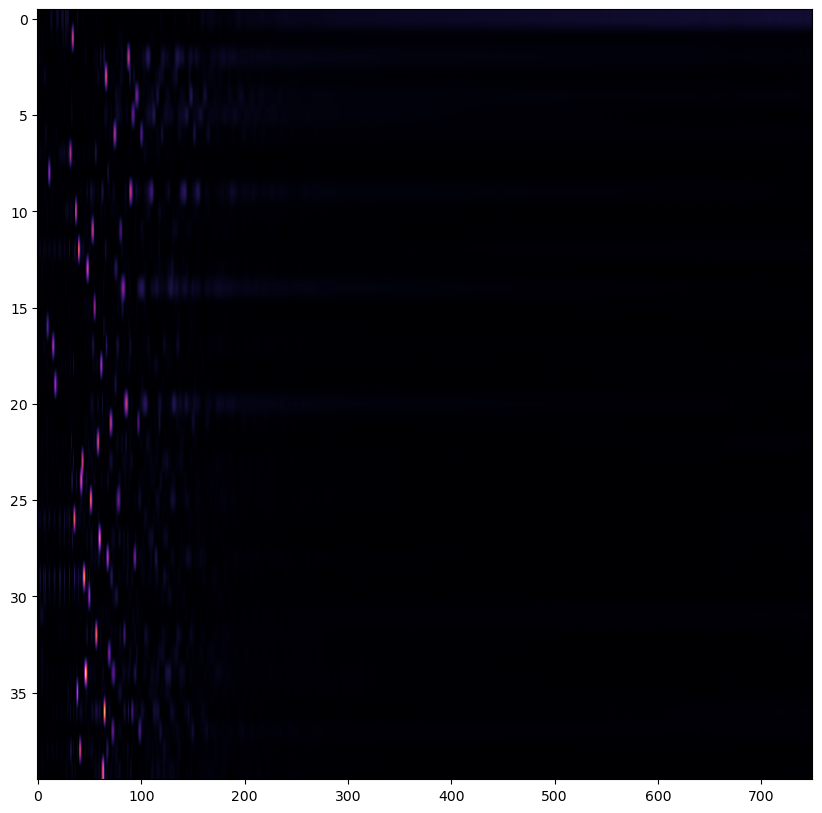

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(best_W.T, aspect='auto', cmap = 'magma')

Starting NMF algorithm with the following parameters:

Max components: 20
Max iterations: 1000
Init: random
Solver: cd
Tolerance: 0.0001
Patience: 5
Random
Random initializers completed
Continuing with best run parameters that are init: nndsvd, solver: cd, tol: 1e-05
Run with 1 components has been completed
Run with 2 components has been completed
Run with 3 components has been completed
Run with 4 components has been completed
Run with 5 components has been completed
Run with 6 components has been completed
Run with 7 components has been completed
Run with 8 components has been completed
Run with 9 components has been completed
Run with 10 components has been completed
Run with 11 components has been completed
Run with 12 components has been completed
Run with 13 components has been completed
Run with 14 components has been completed
Run with 15 components has been completed
Run with 16 components has been completed
Run with 17 components has been completed
Run with 18 components has 

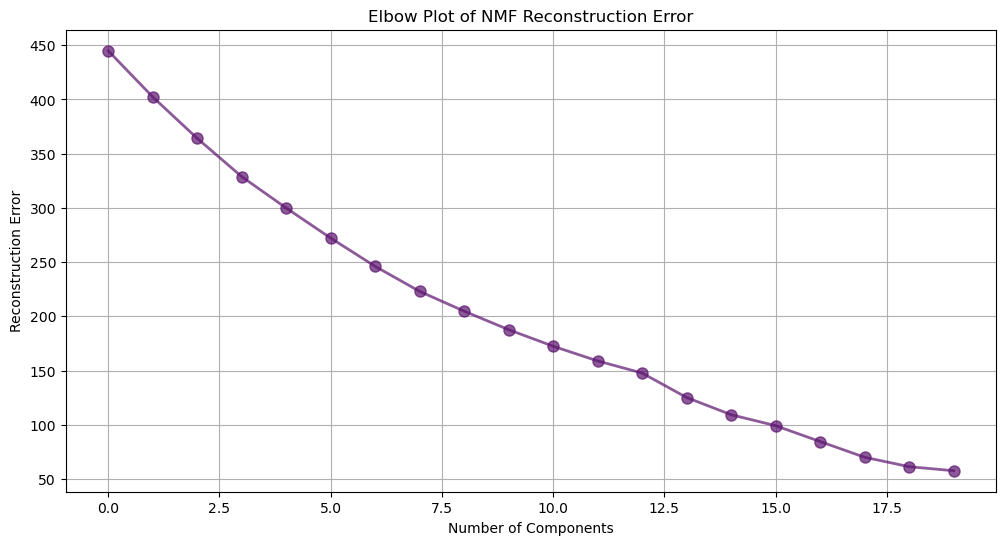

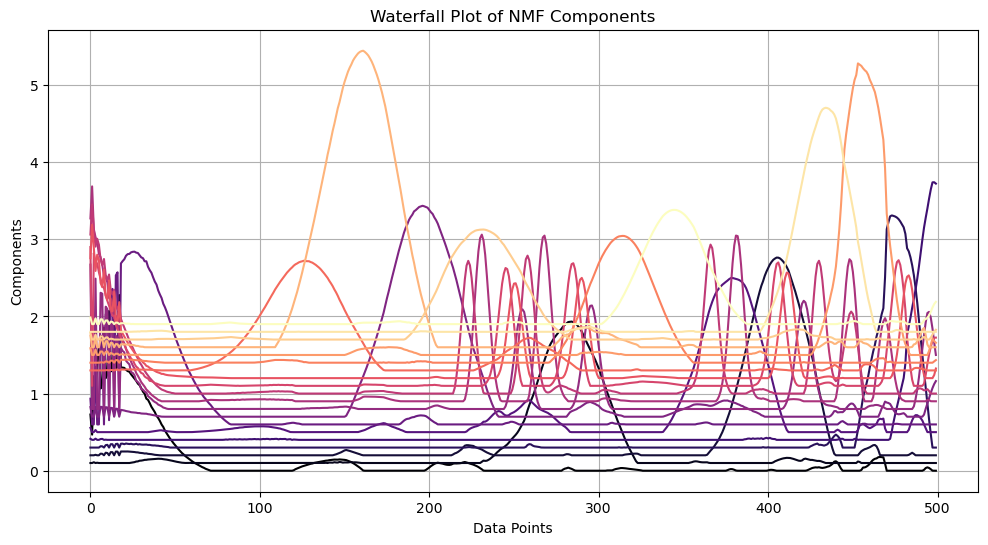

The best number of components is 20


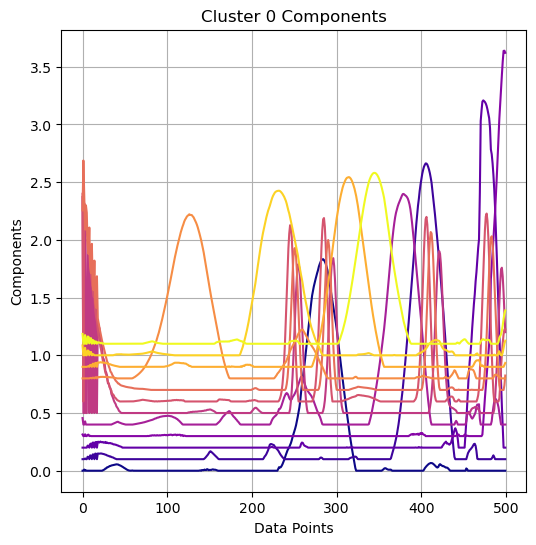

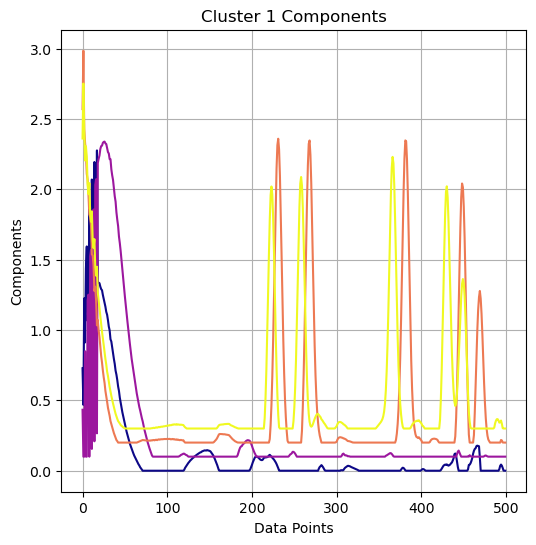

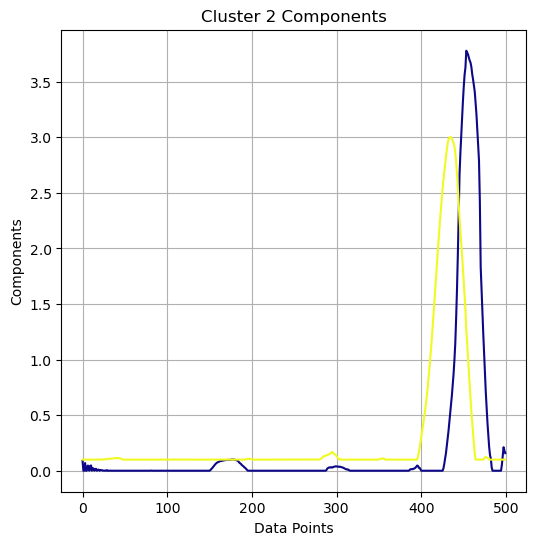

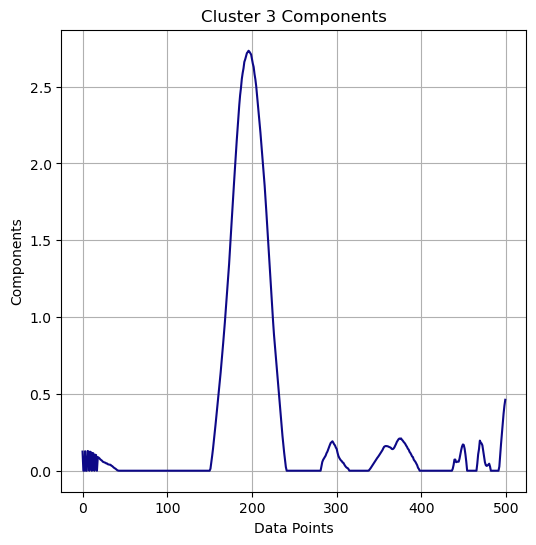

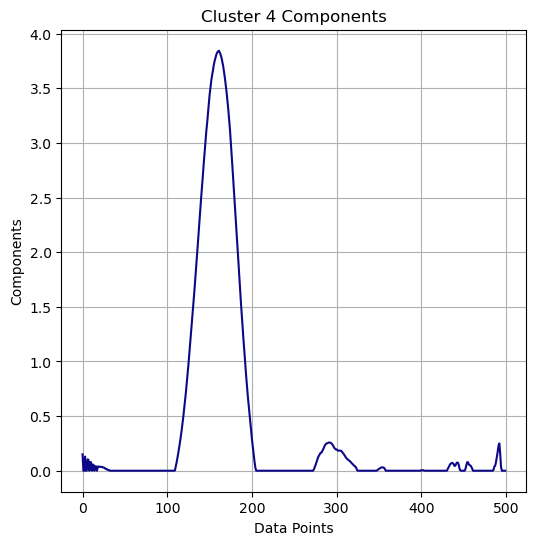

In [9]:
best_W, best_H, best_reconstruction_err, data_dict =  iso.run_sklearn_nmf_and_agg_cluster(combined_rot_data, max_components = 20, max_iter = 1000, n_clusters = 5, cluster_matrix = 'W')

Starting NMF algorithm with the following parameters:

Max components: 20
Max iterations: 1000
Init: random
Solver: cd
Tolerance: 0.0001
Patience: 5
Random
Random initializers completed
Continuing with best run parameters that are init: nndsvda, solver: mu, tol: 1e-05
Run with 1 components has been completed
Run with 2 components has been completed
Run with 3 components has been completed
Run with 4 components has been completed
Run with 5 components has been completed
Run with 6 components has been completed
Run with 7 components has been completed
Run with 8 components has been completed
Run with 9 components has been completed
Run with 10 components has been completed
Run with 11 components has been completed
Run with 12 components has been completed
Run with 13 components has been completed
Run with 14 components has been completed
Run with 15 components has been completed
Run with 16 components has been completed
Run with 17 components has been completed
Run with 18 components has

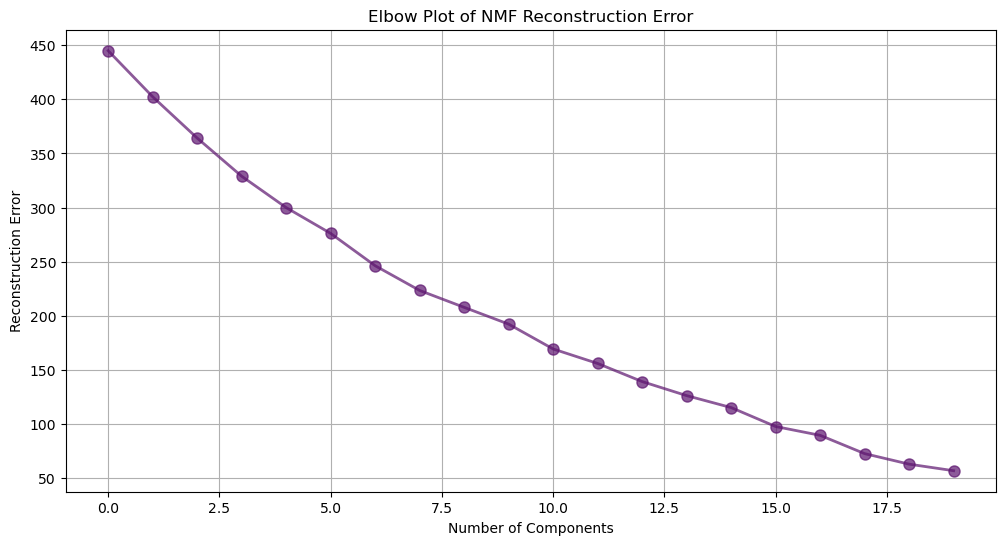

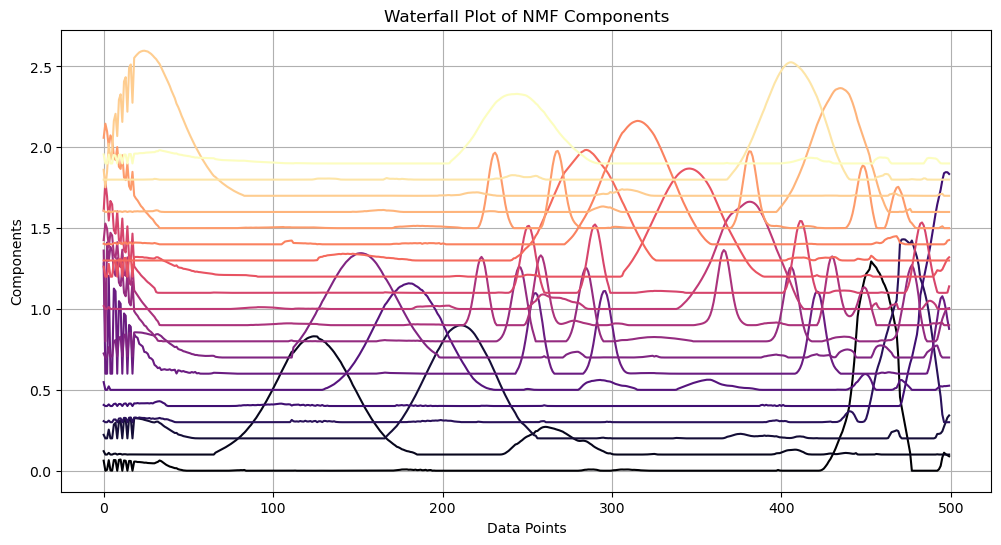

The best number of components is 20


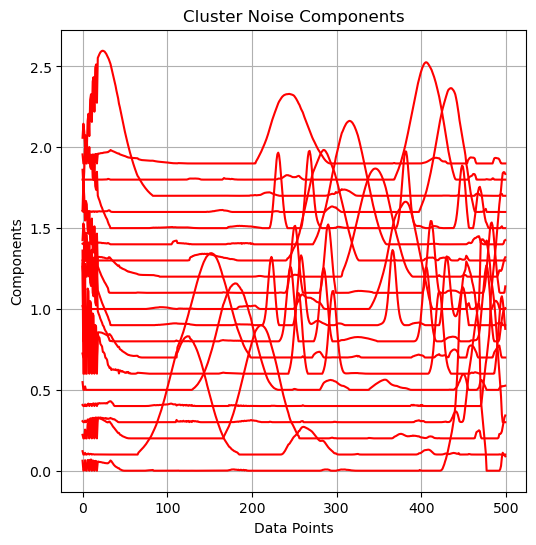

In [15]:
best_W, best_H, best_reconstruction_err, data_dict =  iso.run_sklearn_nmf_and_dbscan(combined_rot_data, max_components = 20, min_samples= 5, eps = 0.5, max_iter = 1000, cluster_matrix = 'W')

Starting NMF algorithm with the following parameters:

Max components: 20
Max iterations: 1000
Init: random
Solver: cd
Tolerance: 0.0001
Patience: 5
Random
Random initializers completed
Continuing with best run parameters that are init: nndsvdar, solver: cd, tol: 0.0001
Run with 1 components has been completed
Run with 2 components has been completed
Run with 3 components has been completed
Run with 4 components has been completed
Run with 5 components has been completed
Run with 6 components has been completed
Run with 7 components has been completed
Run with 8 components has been completed
Run with 9 components has been completed
Run with 10 components has been completed
Run with 11 components has been completed
Run with 12 components has been completed
Run with 13 components has been completed
Run with 14 components has been completed
Run with 15 components has been completed
Run with 16 components has been completed
Run with 17 components has been completed
Run with 18 components h

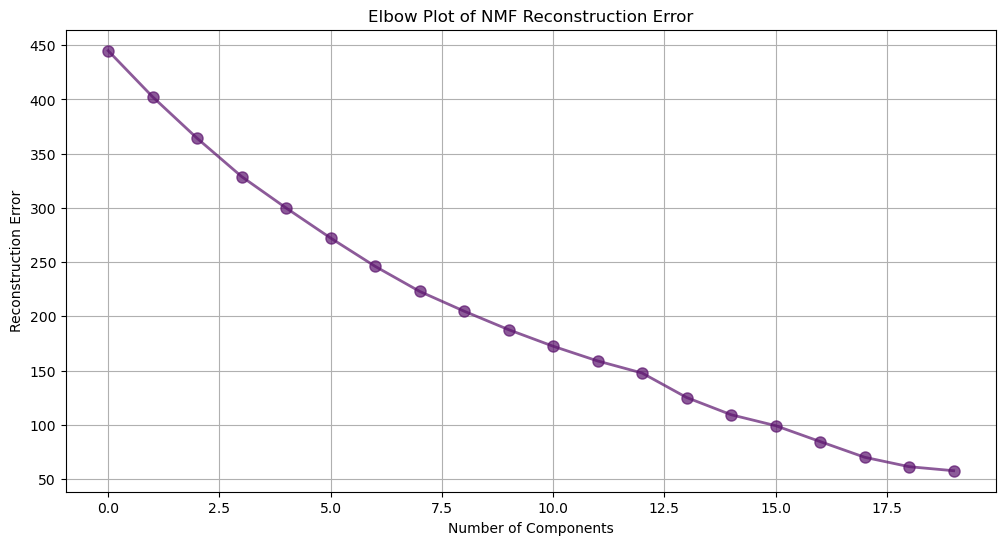

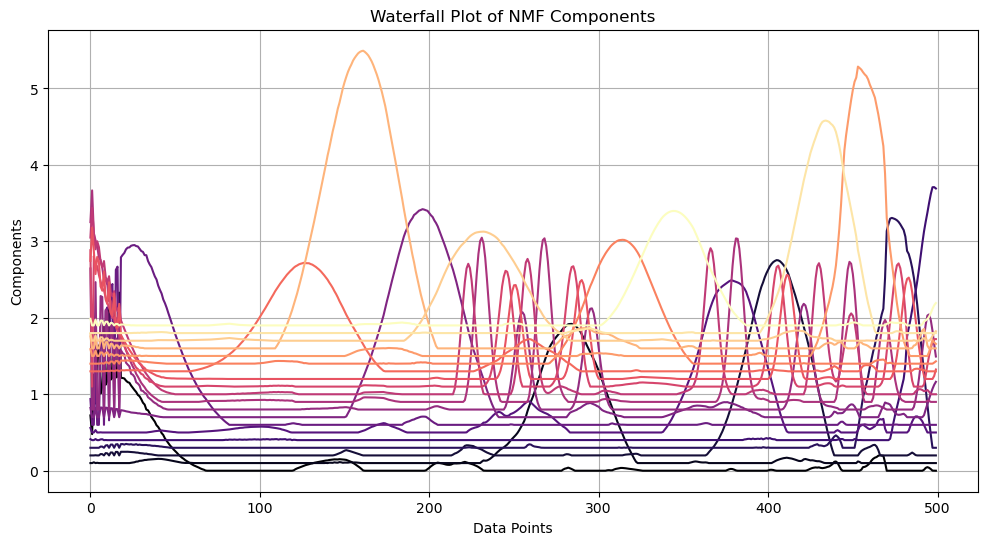

The best number of components is 20


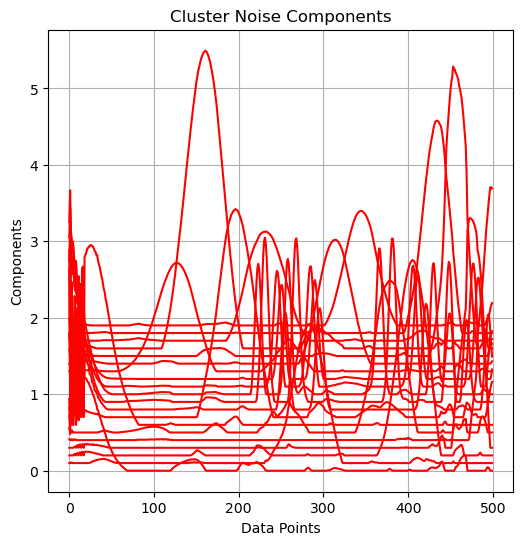

In [12]:
best_W, best_H, best_reconstruction_err, data_dict =  iso.run_sklearn_nmf_and_hdbscan(combined_rot_data, max_components = 20, max_iter = 1000, cluster_matrix = 'W')